In [1]:
# Reads in photometry from different sources, normalizes them, and puts them
# onto a BJD time scale

# Created 2021 Dec. 28 by E.S.

In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib qt

In [4]:
## USER INPUTS

photometry_source_file = "bh_peg_long_baseline_aavso_prepolished.txt"

In [5]:
stem_super = "/Users/bandari/Documents/git.repos/rrlfe/notebooks_for_development/"
stem_public_sources = stem_super + "all_photometry_program_stars/polished/"
bjd_sources = stem_super + "all_photometry_program_stars/bjds/"

In [6]:
# read in photometry

df = pd.read_csv(stem_public_sources + photometry_source_file)
#df = pd.read_csv(stem_public_sources + photometry_source_file, delim_whitespace=True)

In [7]:
#df_test = pd.read_csv("./all_photometry_program_stars/raw/bh_peg_pan_starss.txt")
df_test2 = pd.read_csv("./all_photometry_program_stars/polished/bh_peg_aavso_polished_ingest.txt",
                       names=["jd","mag","error"], delim_whitespace=True)

In [18]:
# flag observations by the session in which they were taken

df_test2["session"] = 0
df_test2.loc[df_test2.jd < 2457302,"session"] = 1
df_test2.loc[np.logical_and(df_test2.jd > 2457302, df_test2.jd < 2457500),"session"] = 2
df_test2.loc[np.logical_and(df_test2.jd > 2457500, df_test2.jd < 2458000),"session"] = 3
df_test2.loc[np.logical_and(df_test2.jd > 2458000, df_test2.jd < 2458500),"session"] = 4
df_test2.loc[np.logical_and(df_test2.jd > 2458500, df_test2.jd < 2459000),"session"] = 5
df_test2.loc[np.logical_and(df_test2.jd > 2459000, df_test2.jd < 2459300),"session"] = 6
df_test2.loc[np.logical_and(df_test2.jd > 2459300, df_test2.jd < 2459444),"session"] = 7
df_test2.loc[np.logical_and(df_test2.jd > 2459444, df_test2.jd < 2459500),"session"] = 8

In [27]:
# Loop through different period values and do the following:
# 0. Phase-fold
# 1. Treat data points in session 3 as the fixed template and draw a simple polynomial trend line through it
# 2. Shift each 'session' in y to leave the least residuals with that template
# 3. Find what the total residuals are
# Error in the period is determined by the range of period values with residuals within a certain range

In [26]:
groups = df_test2.groupby('session')
for name, group in groups:
    plt.plot(group.jd, group.mag, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

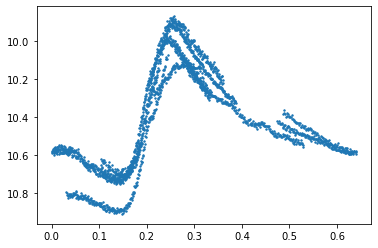

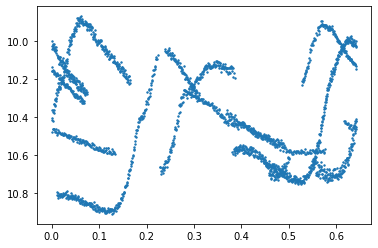

In [6]:
# quick plot

plt.clf()
plt.scatter(np.mod(df_test2["jd"],0.640993), df_test2["mag"], s=2)
plt.gca().invert_yaxis()
plt.show()

plt.scatter(np.mod(df_test2["jd"],0.642), df_test2["mag"], s=2)
plt.gca().invert_yaxis()
plt.show()